In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datos = np.genfromtxt('ej-ajuste-03.txt')
x = datos[:,0]
y = datos[:,1]

Text(0, 0.5, '$y$')

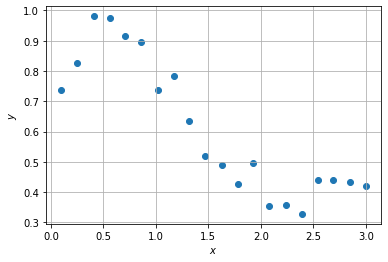

In [3]:
plt.scatter(x,y)
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$y$')

En este caso, ajustaremos la siguiente función (modelo) a los datos:
$$
f(x)=a+e^{-bx}\sin(cx),
$$
donde $a,b$ y $c$ son los parámetros a ajustar usando el método de mínimos cuadrados.

In [4]:
def f(x,a,b,c):
    return a+np.exp(-b*x)*np.sin(c*x)

In [5]:
xx = np.linspace(0,3.5,100)
def p(a=1,b=1,c=1):
    plt.scatter(x,y)
    plt.plot(xx,f(xx,a,b,c), color='red')
    plt.xlim(0,3.5)
    plt.ylim(0,1.2)
    plt.grid(True)
    chi2 = np.sum((y-f(x,a,b,c))**2)
    print(chi2)

In [6]:
from ipywidgets import interact
interact(p,a=(0,5,0.1),b=(0,5,0.1),c=(0,5,0.1))

interactive(children=(FloatSlider(value=1.0, description='a', max=5.0), FloatSlider(value=1.0, description='b'…

<function __main__.p(a=1, b=1, c=1)>

In [7]:
from scipy.optimize import curve_fit

In [8]:
ao, bo, co = curve_fit(f,x,y)[0]

0.03819275173714228


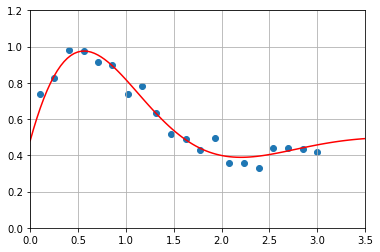

In [9]:
p(ao,bo,co)

Alternativamente, puede usarse la fución `leastsq` de  `scipy.optimize`, que es más poderosa y flexible, pero tiene una sintexis algo menos amigable:

In [10]:
from scipy.optimize import leastsq

In [11]:
def res(p,x,y):
    return y-(p[0] + np.exp(-p[1]*x)*np.sin(p[2]*x))

In [12]:
p_ini = [0.5,1,2]

In [13]:
leastsq(res,p_ini,args=(x,y))[0]

array([0.48091602, 1.02623426, 1.91603567])

In [14]:
curve_fit(f,x,y)[0]

array([0.48091595, 1.02623345, 1.91603506])